## The awesomeness of Numpy arrays
Let's see some things we can do with numpy arrays. First, we can retrieve specific subsets of an array by indexing:

In [ ]:
import numpy as np
from IPython.display import Audio
from scipy.io.wavfile import read, write
(fs, x) = read("../audio/vignesh.wav")

a = x[0:50] #reads from beginning
a

b = x[-50:] #reads from end
b


array([14, 13, 13, 12, 11, 13, 11, 13,  6,  6,  7,  3,  4,  0, -1, -2, -3,
       -1,  0, -2,  3,  0,  3,  4,  0,  6,  0,  2,  2,  1,  0,  2, -4,  4,
       -3,  3,  0,  0,  2, -2,  1, -2,  2, -4,  3, -4,  3, -2,  1, -1],
      dtype=int16)

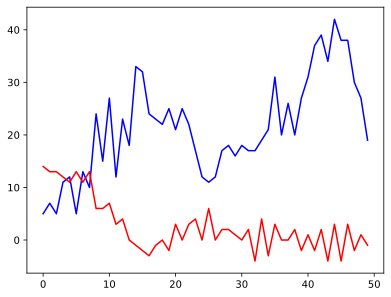

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.plot(a, 'b', b, 'r') #a is data, b is line color (blue)

Math functions are applied element-wise in numpy arrays, which is not the same behavior as python lists. **Lists and arrays are not the same thing!**

For example: adding two lists in python simply concatenates, while adding arrays results in element- (or vector-) wise addition.

In [16]:
#LIST BEHAVIOR:
l1 = ['Hello'] #lists can be as short as one word/component

l2 = ['World']

l1 + l2  #lists concatenate with + operator

['Hello', 'World']

In [18]:
#MORE LIST BEHAVIOR:
l1 = [0, 1, 2, 3]
l2 = [10, 9, 8, 7]

l1 + l2 #lists concatenate with + operator - ie the resulting list is [0,1,2,3,10,9,8,7]

[0, 1, 2, 3, 10, 9, 8, 7]

#### ARRAY BEHAVIOR

if we convert these lists into numpy arrays and add them, notice the result...

In [ ]:
arr1 = np.array(l1) 
arr2 = np.array(l2)
arr1 + arr2 #arrays add element-wise - ie the resulting array is [10,10,10,10]

array([10, 10, 10, 10])

In [23]:
 # arr1 * np.array([1,2])

# Does not work, arrays need to be matching in size

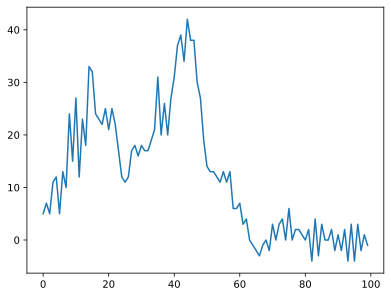

In [26]:
c = np.concatenate((a,b)) # remember "a" and "b" were the first and last 50 samples
plt.plot(c) # more on concatenate later...


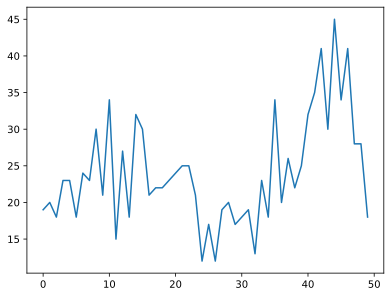

In [28]:
c = a + b 
plt.plot(c)

So returning to our sound file... if we *do* want to concatenate, we need a numpy function (because in digital audio we always want do deal with arrays; they are more efficient).

However, if we want to add the samples together...
(note what happens to the amplitude)

In the case of adding, what happens if the arrays are not of the same length? 
Test this yourself: Take a moment to make two arrays, but make them different lengths and then add together and see what happens.

### Creating Arrays

The above "manual" way of creating an array is useful only if you have a very short list. Sometimes you want to make a very large or complex array. In this case, you'll want a function to help you make the list in the first place. Enter two functions we will be using **a lot:**

* np.arange()
* np.linspace()

In [29]:
#recall:
?np.arange

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

``arange`` can be called with a varying number of positional arguments:

* ``arange(stop)``: Values are generated within the half-open interval
  ``[0, stop)`` (in other words, the interval including `start` but
  excluding `stop`).
* ``arange(start, stop)``: Values are generated within the half-open
  interval ``[start, stop)``.
* ``arange(start, stop, step)`` Values are generated within the half-open
  interval ``[start, stop)``, with spacing between values given by
  ``step``.

For integer arguments the function is roughly equivalent to the Python
built-in :py:class:`range`, but returns an ndarray rather than a ``range``
instance.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`.

See the Warning sections below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interva

In [32]:
n = np.arange(100, 10 -10)
n

array([], dtype=int64)

In [ ]:
?np.linspace 

The difference between these two functions is that `np.linspace()` enables you to control the precise end values (when you want to get n number of samples between known values x and y), whereas `np.arange()` gives you more direct control over the increments between values in the sequence (you want to generate samples spaced n apart between x and y).

Although ultimately both functions do the same thing, you'll come to realize one may be handier than the other in different situations.

### Array Indexing
Recall: Index arrays by using square brackets (just like lists). A[x] will index the xth+1 item (because Python indexing starts from zero.) So calling A[5] will give you the sixth element of A, or the thing at the fifth index position.  

You can also give it a range (e.g., A[5:10]), and you can also call a range from the end by prepending a "-" sign like in the example below. Finally, you can increment by adding another value after the colon.

In [35]:
x = np.arange(200)
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

How would we get the 51st element of x?

How about the first 50 samples (sample 0 through 49)

Or the last 100 samples?

How about every other sample across the first 100?

In [33]:
 x[0:100:2]

array([  5,   5,  12,  13,  24,  27,  23,  33,  24,  22,  21,  22,  12,
        12,  18,  18,  17,  21,  20,  20,  31,  39,  42,  38,  27,  33,
        44,  33,  37,  11,   9,   1,   1,   4,  -1,  -1,  -1,   1,  12,
        14,  14,   7,  -1,  -5, -10, -18, -28, -20, -34, -30], dtype=int16)

This added the value of each element of "a" to each element of "b" (because the dimensions of the 
two vectors could be interpreted)

In order to add, subtract, multiply, etc. two or more arrays together, their shapes are important. (Broadcasting is complicated and we won't get into it here.) Most of the time you'll be trying to modify an entire array by adding, subtracting or multiplying by a single value, or else adding two arrays of the same length together. 

What else can we do with arrays? We can apply basic math functions to them, and do lots of other stuff. We'll get back to this later but if you're impatient you can [read the documentation](https://docs.scipy.org/doc/numpy/user/quickstart.html).

## Basic math

### Writing audio files
OK, let's say we want to *write* a .wav file from a numpy array. No problem. We just call the `write` function from `Scipy.io.wavfile`, and pass the function the name of the file we want to create, and a sample rate:

We will be using the "Audio" function from Ipython for listening to sounds.

Note: **ALWAYS BE CAREFUL WHEN LISTENING!!!**

However, we can also just pass a numpy array directly to the Audio module:

## Useful References
Numpy also provides many functions to create arrays that will prove useful later on...

In [ ]:
myarray = np.array([1,2,3,4,5,6]) #single array
myarray2 = np.array([[1,2,3],[4,5,6]]) # multidimentional array of shape (2,3)
zeros = np.zeros(7) #array of length 7 filled with all zeros
ones = np.ones(7) #array of length 7 filled with all ones
static = np.full(7,2) # array of length 7 filled with a number I chose (2).
random = np.random.random(7) #array of length 7 filled with random values between 0 and 1
random5 = np.random.uniform(0,5,7) #from, to, length -- note that it returns floating values

Let's take advantage of some numpy features to continue manipulating our audio file.  
## We can reverse the values

## We can randomize the elements inside
Caution: there are a few ways to do this and some do it "in place" (meaning they overwrite the variable! Be careful!)

Notice this one samples with replacement, so it doesn't necessarily use every element once.

We can also use the `.random` module to generate random arrays of elements from scratch:

## Remove/delete values
The "delete" function in numpy technically cannot delete an item from your array. However, you can construct a new array minus the values you don't want, like this:

## Add/append values
With python lists if you add lists together, you append. But with arrays if you add them together you get vector-wise calculation across the two arrays. So to concatenate we need:

Note the use of double parentheses above. The set of arrays to be appended is a single argument so if you don't include the parentheses the thing after the comma gets interpreted as the second agrument to the function (which happens to be the axis to concatenate along with default = none.) 

Check out the documentaton for more info, or experiment with different axes to see what happens (0 or 1). Note that the append method does something very similar. (More later).

## Repeat elements
We can also use a function calle `np.tile` to repeat some array by some given number of repetitions:

There's also a function called `np.repeat` which can repeat individual elements of an array:

#### Getting ahead of ourselves...
Notice you could use the `np.zeros` or `np.ones` functions in combination with the above functions to create boolean masks with another function called `np.ma.make_mask` For example:

In [ ]:
#Find all values that are not zero (or: return array without any zero values)
x = np.zeros(10)
y = np.ones(10)
z = np.concatenate((x,y))
m = np.ma.make_mask(z) # interprets all 0s as false and everything else true
c = np.random.random(20)
z[m]

## Insert values
You can also insert values by using `np.insert` and providing a new array of numbers that will be placed before the indices specified:

## Change values
You can change values by indexing a specific location:

## Split arrays
The `np.array_split` function will split an array into N equal sections. Unlike the `np.split` function, it will not throw an error if N does not evenly divide into the array, as below: